In [16]:
# pip installmatplotlib ase notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ase.io import read
import os
path = os.path.join("trajectories\\")
# Load the trajectory file (adjust the filename accordingly)
with open(path+'postvis_dani.traj', 'r') as f:
    trajectory = f.readlines()


traj =  [i.split(" ") for i in trajectory[1:-1]] 
   

In [17]:
data_dict = {}
for line in traj:
    key = int(line[0])

    if key in data_dict:
        data_dict[key].append([float(i) for i in line[1:-1]])
    else:
        data_dict[key] = [[float(i) for i in line[1:-1]]]

MovieWriter ffmpeg unavailable; using Pillow instead.


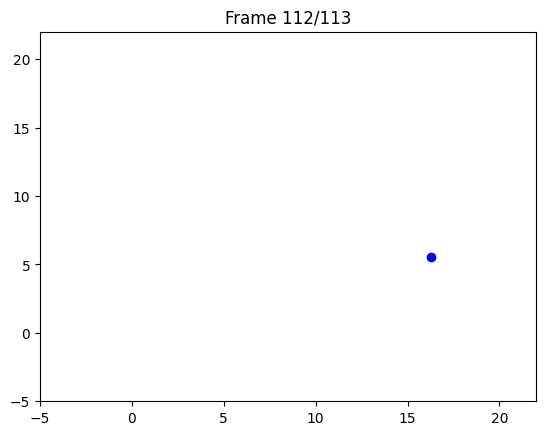

In [18]:

fig, ax = plt.subplots()
max_frame = max([len(i) for i in data_dict.values()])
def update(frame):
        ax.clear()
        for agent in data_dict.keys():
            
            if len(data_dict[agent]) > frame:
                # Plot the atoms
                ax.scatter(data_dict[agent][frame][2], data_dict[agent][frame][3], c='b', marker='o')

                # Set plot limits (adjust as needed)
                ax.set_xlim(-5, 22)
                ax.set_ylim(-5, 22)

                # Set plot title
                ax.set_title(f'Frame {frame}/{max_frame}')
            



# Create the animation
animation = FuncAnimation(fig, update, frames=max_frame, interval=150, repeat=False).save("animation.gif")
plt.show()